In [1]:
# We Try to make predictions based on errors 
# you consider a mean and erro and followup next prediction as c1*Error , where c1 id the constant and Error 
# and you add it up with the mean or formal value and do next prediction and try to keepup with the trend 
# f= mu( mean )+ constant* error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

from datetime import datetime, timedelta
register_matplotlib_converters()

In [3]:
# Tried to generate a Pure Moving Average model and wanted to generate error between [0,1 ] normally distributed 
errors = np.random.normal(0, 1, 400)

In [4]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020') #Betwwem 4 months trying to generate the data

In [5]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t]) # Generating the value from the formula 

In [6]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index)) # made it as frequencies so that it could be plotted correctly 

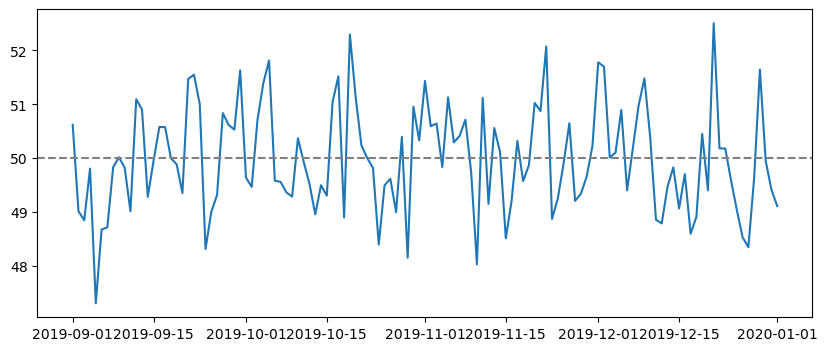

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [8]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

<BarContainer object of 10 artists>

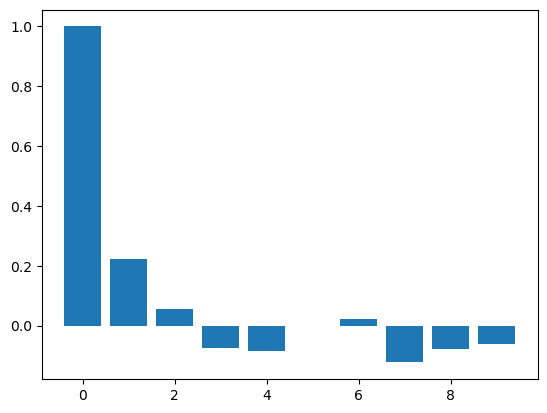

In [9]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 20 artists>

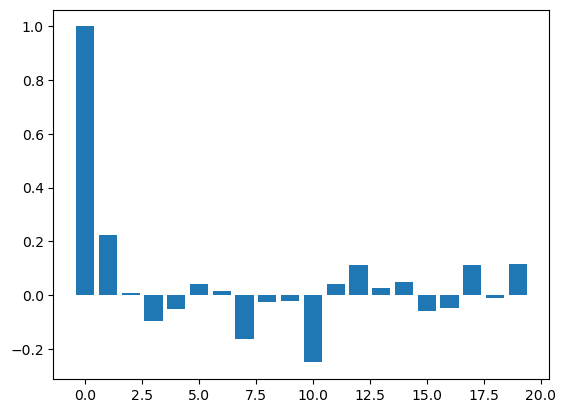

In [10]:
pacf_vals = pacf(series)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [11]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [12]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [13]:
#fit the model
model_fit = model.fit()

In [14]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -167.365
Date:                Wed, 15 May 2024   AIC                            342.730
Time:                        20:29:10   BIC                            353.913
Sample:                    09-01-2019   HQIC                           347.272
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9951      0.118    425.154      0.000      49.765      50.226
ma.L1          0.2197      0.094      2.331      0.020       0.035       0.404
ma.L2          0.1039      0.110      0.947      0.3

In [15]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [16]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [17]:
residuals = test_data - predictions

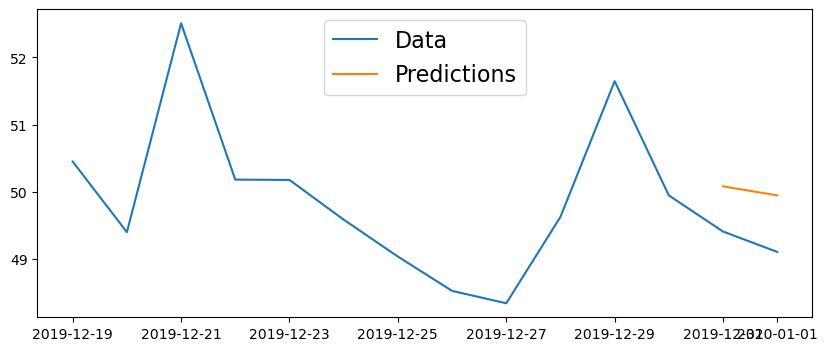

In [18]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [19]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0153


In [20]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.7597582925026807
